<a href="https://colab.research.google.com/github/premanshsharma/Brain-Tumor-Detection/blob/main/BrainTumoreDetection_Python_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Detection and Analysis of different algorithms.

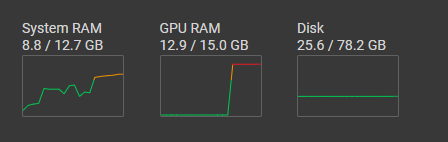

In [2]:
import os
import cv2
import keras 
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
plt.style.use('dark_background')


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
paths_yes = []
for r, d, f in os.walk(r'/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes'):
    for file in f:
        if '.jpg' in file:
            paths_yes.append(os.path.join(r, file))

paths_no = []
for r, d, f in os.walk(r'/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/no'):
    for file in f:
        if '.jpg' in file:
            paths_no.append(os.path.join(r, file))

# Neural Network Implementation:- VGG16, VGG19

## Dataset Input

In [39]:
data = []
result = []
def image_input(paths, result_int):
    i = 0
    for path in paths:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
        print(result_int, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            data.append(np.array(img))
            result.append([result_int])

image_input(paths_yes, 0)
image_input(paths_no, 1)

0 0 (224, 224, 3)
0 1 (224, 224, 3)
0 2 (224, 224, 3)
0 3 (224, 224, 3)
0 4 (224, 224, 3)
0 5 (224, 224, 3)
0 6 (224, 224, 3)
0 7 (224, 224, 3)
0 8 (224, 224, 3)
0 9 (224, 224, 3)
0 10 (224, 224, 3)
0 11 (224, 224, 3)
0 12 (224, 224, 3)
0 13 (224, 224, 3)
0 14 (224, 224, 3)
0 15 (224, 224, 3)
0 16 (224, 224, 3)
0 17 (224, 224, 3)
0 18 (224, 224, 3)
0 19 (224, 224, 3)
0 20 (224, 224, 3)
0 21 (224, 224, 3)
0 22 (224, 224, 3)
0 23 (224, 224, 3)
0 24 (224, 224, 3)
0 25 (224, 224, 3)
0 26 (224, 224, 3)
0 27 (224, 224, 3)
0 28 (224, 224, 3)
0 29 (224, 224, 3)
0 30 (224, 224, 3)
0 31 (224, 224, 3)
0 32 (224, 224, 3)
0 33 (224, 224, 3)
0 34 (224, 224, 3)
0 35 (224, 224, 3)
0 36 (224, 224, 3)
0 37 (224, 224, 3)
0 38 (224, 224, 3)
0 39 (224, 224, 3)
0 40 (224, 224, 3)
0 41 (224, 224, 3)
0 42 (224, 224, 3)
0 43 (224, 224, 3)
0 44 (224, 224, 3)
0 45 (224, 224, 3)
0 46 (224, 224, 3)
0 47 (224, 224, 3)
0 48 (224, 224, 3)
0 49 (224, 224, 3)
0 50 (224, 224, 3)
0 51 (224, 224, 3)
0 52 (224, 224, 3)
0 5

In [40]:
data = np.array(data)
data.shape

(3000, 224, 224, 3)

In [41]:
result = np.array(result)
result = result.reshape(3000,1)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle = True, random_state = 8)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 8)

In [43]:
x_train, x_val, x_test = np.array(x_train), np.array(x_val), np.array(x_test)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

In [44]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(1800, 224, 224, 3) (1800, 1) (600, 224, 224, 3) (600, 1) (600, 224, 224, 3) (600, 1)


In [45]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_train, y_val = np.array(y_train), np.array(y_val)

In [46]:
y_test = to_categorical(y_test, num_classes=2)
y_test = np.array(y_test)

In [47]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)

In [48]:
tf.config.run_functions_eagerly(True)

##VGG16

In [49]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))|
model_VGG_16 = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=max,
    classes=2,
    classifier_activation="sigmoid",
)

opt = Adam(lr=0.001)
model_VGG_16.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history_vgg16 = model_VGG_16.fit(
    x_train, y_train, 
    epochs=100, batch_size=40, 
    validation_data=(x_val, y_val), callbacks=[es]
)

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
45/45 [==============================] - ETA: 0s - loss: 60.0025 - accuracy: 0.5811

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 [==============================] - 67s 1s/step - loss: 60.0025 - accuracy: 0.5811 - val_loss: 0.5904 - val_accuracy: 0.7200
Epoch 2/100
45/45 [==============================] - 49s 1s/step - loss: 0.5755 - accuracy: 0.6961 - val_loss: 0.5028 - val_accuracy: 0.7583
Epoch 3/100
45/45 [==============================] - 48s 1s/step - loss: 0.5226 - accuracy: 0.7322 - val_loss: 0.6393 - val_accuracy: 0.7283
Epoch 4/100
45/45 [==============================] - 50s 1s/step - loss: 0.5310 - accuracy: 0.7100 - val_loss: 0.4981 - val_accuracy: 0.7567
Epoch 5/100
45/45 [==============================] - 49s 1s/step - loss: 0.4690 - accuracy: 0.7689 - val_loss: 0.4322 - val_accuracy: 0.7917
Epoch 6/100
45/45 [==============================] - 50s 1s/step - loss: 0.4715 - accuracy: 0.7806 - val_loss: 0.4493 - val_accuracy: 0.8200
Epoch 7/100
45/45 [==============================] - 49s 1s/step - loss: 0.3837 - accuracy: 0.8439 - val_loss: 0.3598 - val_accuracy: 0.8400
Epoch 8/100
45/45 [=====

In [51]:
print("Evaluate on test data")
results_vgg16 = model_VGG_16.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results_vgg16)

Evaluate on test data


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 12s 710ms/step - loss: 0.1803 - accuracy: 0.9633
test loss, test acc: [0.1802951693534851, 0.9633333086967468]


##VGG19

In [52]:
model_VGG_19 = tf.keras.applications.VGG19(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=max,
    classes=2,
    classifier_activation="sigmoid",
)

opt = Adam(lr=0.001)
model_VGG_19.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
history_vgg19 = model_VGG_19.fit(x_train, y_train, epochs = 100, batch_size = 40, validation_data = (x_val, y_val), callbacks=[es])

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
45/45 [==============================] - ETA: 0s - loss: 419.1444 - accuracy: 0.5278

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


45/45 [==============================] - 54s 1s/step - loss: 419.1444 - accuracy: 0.5278 - val_loss: 0.6999 - val_accuracy: 0.4450
Epoch 2/100
45/45 [==============================] - 49s 1s/step - loss: 0.6791 - accuracy: 0.5789 - val_loss: 0.6863 - val_accuracy: 0.5833
Epoch 3/100
45/45 [==============================] - 50s 1s/step - loss: 0.6499 - accuracy: 0.6406 - val_loss: 0.5449 - val_accuracy: 0.7467
Epoch 4/100
45/45 [==============================] - 51s 1s/step - loss: 0.6081 - accuracy: 0.6956 - val_loss: 0.5893 - val_accuracy: 0.7650
Epoch 5/100
45/45 [==============================] - 50s 1s/step - loss: 0.5550 - accuracy: 0.7361 - val_loss: 0.5114 - val_accuracy: 0.7667
Epoch 6/100
45/45 [==============================] - 49s 1s/step - loss: 0.5547 - accuracy: 0.7394 - val_loss: 0.5516 - val_accuracy: 0.7600
Epoch 7/100
45/45 [==============================] - 50s 1s/step - loss: 0.5164 - accuracy: 0.7467 - val_loss: 0.5387 - val_accuracy: 0.7583
Epoch 8/100
45/45 [====

In [54]:
print("Evaluate on test data")
results_vgg19 = model_VGG_19.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results_vgg19)

Evaluate on test data


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 4s 381ms/step - loss: 0.1633 - accuracy: 0.9567
test loss, test acc: [0.16331642866134644, 0.9566666483879089]


In [63]:
# print(history)
def plot_graph_of_history(histories, arch_name, epoch_range):
    for history in histories:
        loss_train = history.history['accuracy']
        loss_val = history.history['val_accuracy']
        epochs = range(1,epoch_range)
        plt.plot(epochs[:len(loss_train)], loss_train, label='Training accuracy {}'.format(arch_name))
        plt.plot(epochs[:len(loss_val)], loss_val, label='validation accuracy {}'.format(arch_name))
        plt.xlim(1, 101)
        plt.title('Training and Validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
    plt.show()

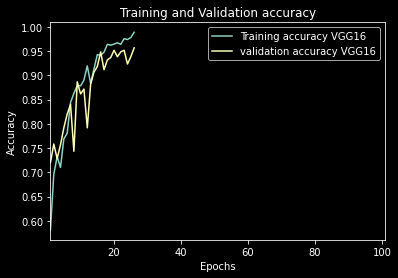

In [64]:
plot_graph_of_history([history_vgg16], 'VGG16', 30)

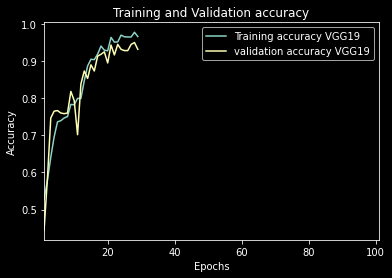

In [65]:
plot_graph_of_history([history_vgg19], 'VGG19', 30)

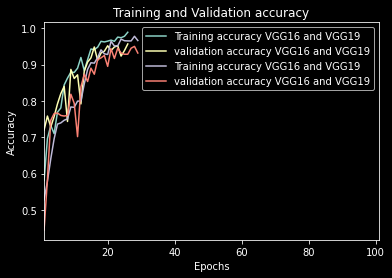

In [66]:
plot_graph_of_history([history_vgg16, history_vgg19], 'VGG16 and VGG19', 30)

#Machine Learning Algorithms Implementation

## Creating Dataset For Training

In [11]:
datalr = []
resultlr = []
def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            datalr.append(np.array(img))
            resultlr.append(op)
data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)

0 0 (224, 224, 3)
0 1 (224, 224, 3)
0 2 (224, 224, 3)
0 3 (224, 224, 3)
0 4 (224, 224, 3)
0 5 (224, 224, 3)
0 6 (224, 224, 3)
0 7 (224, 224, 3)
0 8 (224, 224, 3)
0 9 (224, 224, 3)
0 10 (224, 224, 3)
0 11 (224, 224, 3)
0 12 (224, 224, 3)
0 13 (224, 224, 3)
0 14 (224, 224, 3)
0 15 (224, 224, 3)
0 16 (224, 224, 3)
0 17 (224, 224, 3)
0 18 (224, 224, 3)
0 19 (224, 224, 3)
0 20 (224, 224, 3)
0 21 (224, 224, 3)
0 22 (224, 224, 3)
0 23 (224, 224, 3)
0 24 (224, 224, 3)
0 25 (224, 224, 3)
0 26 (224, 224, 3)
0 27 (224, 224, 3)
0 28 (224, 224, 3)
0 29 (224, 224, 3)
0 30 (224, 224, 3)
0 31 (224, 224, 3)
0 32 (224, 224, 3)
0 33 (224, 224, 3)
0 34 (224, 224, 3)
0 35 (224, 224, 3)
0 36 (224, 224, 3)
0 37 (224, 224, 3)
0 38 (224, 224, 3)
0 39 (224, 224, 3)
0 40 (224, 224, 3)
0 41 (224, 224, 3)
0 42 (224, 224, 3)
0 43 (224, 224, 3)
0 44 (224, 224, 3)
0 45 (224, 224, 3)
0 46 (224, 224, 3)
0 47 (224, 224, 3)
0 48 (224, 224, 3)
0 49 (224, 224, 3)
0 50 (224, 224, 3)
0 51 (224, 224, 3)
0 52 (224, 224, 3)
0 5

In [12]:
print(len(datalr), len(resultlr))

3000 3000


In [13]:
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))

(3000, 224, 672)


In [16]:
print(len(datalr), len(resultlr))

3000 3000


In [17]:
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

2250 750


##KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# Train the KNN algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_trainlr, y_trainlr)

# Predict the classes of the testing data
y_pred = knn.predict(x_testlr)

# Evaluate the performance of the algorithm
accuracy = accuracy_score(y_testlr, y_pred)

In [19]:
cm = confusion_matrix(y_testlr,y_pred)
cm

array([[331,  88],
       [  6, 325]])

In [20]:
accuracy_score(y_testlr,y_pred)

0.8746666666666667

## Logistic Regression

Logistic Regression is not taking all the data set into consideration.

In [21]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=100000)

In [22]:
logisticRegr.fit(x_trainlr, y_trainlr)

LogisticRegression(max_iter=100000)

In [23]:
y_test_pred = logisticRegr.predict(x_testlr)
y_train_pred = logisticRegr.predict(x_trainlr)

In [24]:
accuracy_score(y_testlr,y_test_pred)

0.968

In [25]:
cm = confusion_matrix(y_testlr,y_test_pred)
cm

array([[401,  18],
       [  6, 325]])

## SVM

In [26]:
from sklearn.svm import SVC
svr = SVC(kernel = 'linear',C = 1000)
svr.fit(x_trainlr,y_trainlr)

SVC(C=1000, kernel='linear')

In [27]:
y_test_pred = svr.predict(x_testlr)
y_train_pred = svr.predict(x_trainlr)

In [28]:
accuracy_score(y_testlr,y_test_pred)

0.9626666666666667

In [29]:
cm = confusion_matrix(y_testlr,y_test_pred)
cm

array([[399,  20],
       [  8, 323]])

##Naive Bayes Classifier

In [30]:
data_1d = []
for i in datalr:
    data_1d.append(i.flatten())

In [31]:
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

2250 750


In [32]:
from sklearn.naive_bayes import GaussianNB
# Train Naive Bayes classifier
clf = GaussianNB()
clf.fit(x_trainlr, y_trainlr)

# Predict labels for testing set
y_pred = clf.predict(x_testlr)

In [33]:
cm = confusion_matrix(y_testlr,y_pred)
cm

array([[262, 157],
       [ 58, 273]])

In [34]:
accuracy_score(y_testlr, y_pred)

0.7133333333333334